Download necessay dependencies (if running on desktop instead of Google Colab)

In [54]:
%pip install seaborn
%pip install numpy
%pip install pandas
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Import the necessary dependencies

In [55]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import shapiro

Load preprocessed dataset

In [56]:
bike_data = pd.read_csv('./data/SeoulBikeData_Processed.csv', encoding='unicode_escape')


## Training Our First Model (Polynomial Regression)

Spliting the Data

In [57]:
x_train, x_test, y_train, y_test = train_test_split(bike_data.drop(['Rented Bike Count'], axis=1), bike_data['Rented Bike Count'], test_size=0.2, random_state=21)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7008, 13)
(1752, 13)
(7008,)
(1752,)


Scaling the Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

x_train_min = x_train.min()
x_train_max = x_train.max()

x_train_scaled = scaler.fit_transform(x_train)

# x_test_scaled = scaler.fit_transform(x_test)
x_test_scaled = (x_test - x_train_min) / (x_train_max - x_train_min)


y_train_min = y_train.min()
y_train_max = y_train.max()

y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))

# y_test_scaled = scaler.fit_transform(y_test.values.reshape(-1, 1))
#y_test_scaled = (y_test - y_train_min) / (y_train_max - y_train_min)
y_test_scaled = (y_test.values.reshape(-1, 1) - y_train_min) / (y_train_max - y_train_min)

print(x_train_scaled)
print(x_test_scaled)
print(y_train_scaled)
print(y_test_scaled)

[[0.7826087  0.4020979  0.44897959 ... 0.         1.         0.03846154]
 [0.47826087 0.66958042 0.80612245 ... 0.         1.         0.45054945]
 [0.         0.26398601 0.41836735 ... 1.         1.         0.12912088]
 ...
 [0.         0.38111888 0.59183673 ... 0.         1.         0.92307692]
 [0.69565217 0.8986014  0.58163265 ... 0.         1.         0.59340659]
 [1.         0.7465035  0.8877551  ... 0.         1.         0.52197802]]
          Hour  Temperature(Â°C)  Humidity(%)  Wind speed (m/s)  \
6771  0.130435          0.615385     0.581633          0.081081   
5878  0.956522          0.886364     0.653061          0.135135   
2905  0.043478          0.515734     0.755102          0.067568   
6167  1.000000          0.840909     0.663265          0.054054   
6431  1.000000          0.711538     0.795918          0.189189   
...        ...               ...          ...               ...   
1471  0.304348          0.250000     0.846939          0.216216   
8692  0.173913      

We apply the same scaling to our test data based on the characteristics of  the training data. This way we ensure that both the training and test data are scaled correclty.

Testing Different Polynomial Degrees

In [59]:
from sklearn.preprocessing import PolynomialFeatures

mse_training_list = []
mse_test_list = []
mse_training_list_original = []
mse_test_list_original = []

for x in range(1, 5):
  poly = PolynomialFeatures(degree=x)

  x_train_poly = poly.fit_transform(x_train_scaled)
  x_test_poly = poly.fit_transform(x_test_scaled)

  poly_reg_model = LinearRegression()
  poly_reg_model.fit(x_train_poly, y_train_scaled)

  yhat_train = poly_reg_model.predict(x_train_poly)
  yhat_test = poly_reg_model.predict(x_test_poly)

  train_mse = mean_squared_error(y_train_scaled, yhat_train)
  test_mse = mean_squared_error(y_test_scaled, yhat_test)

  mse_training_list.append(train_mse)
  mse_test_list.append(test_mse)

  print('Degree ', x, ' Training Mean squared error: %f' % train_mse)
  print('Degree ', x, ' Test Mean squared error: %f' % test_mse)
  
  mse_train_original = (y_train.std() * train_mse) + y_train.mean()
  #mse_test_orginal = (y_test.std() * test_mse) + y_test.mean()
  mse_test_original = (y_train.std() * test_mse) + y_train.mean()
  mse_training_list_original.append(mse_train_original)
  mse_test_list_original.append(mse_test_original)
  
  print('Degree ', x, ' Original Training Mean squared error: %f' % mse_train_original)
  print('Degree ', x, ' Original Test Mean squared error: %f' % mse_test_original)

Degree  1  Training Mean squared error: 0.014771
Degree  1  Test Mean squared error: 0.015003
Degree  1  Original Training Mean squared error: 714.617566
Degree  1  Original Test Mean squared error: 714.767195
Degree  2  Training Mean squared error: 0.009724
Degree  2  Test Mean squared error: 0.009815
Degree  2  Original Training Mean squared error: 711.371108
Degree  2  Original Test Mean squared error: 711.429776
Degree  3  Training Mean squared error: 0.005771
Degree  3  Test Mean squared error: 0.263546
Degree  3  Original Training Mean squared error: 708.828229
Degree  3  Original Test Mean squared error: 874.660568
Degree  4  Training Mean squared error: 0.003471
Degree  4  Test Mean squared error: 2553515273.707244
Degree  4  Original Training Mean squared error: 707.348544
Degree  4  Original Test Mean squared error: 1642733128778.588623


We noticed that the test dataset MSE for degree 4 is very high. For easier visualization, we did not include degree 4 in our fitting graph.

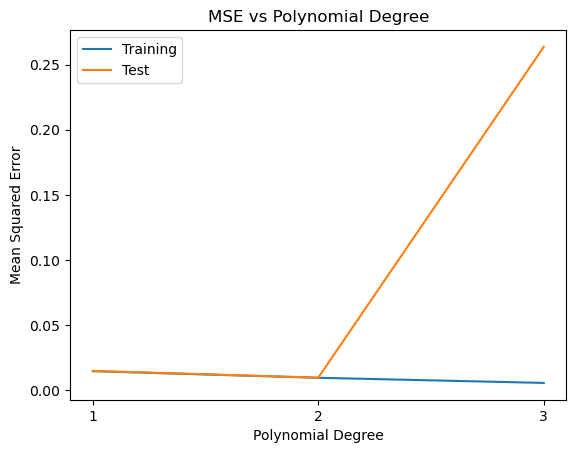

In [60]:
plt.figure()
plt.title('MSE vs Polynomial Degree')
plt.plot(range(1, 4), mse_training_list[0:3], label='Training')
plt.plot(range(1, 4), mse_test_list[0:3], label='Test')
plt.xticks(range(1, 4))

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


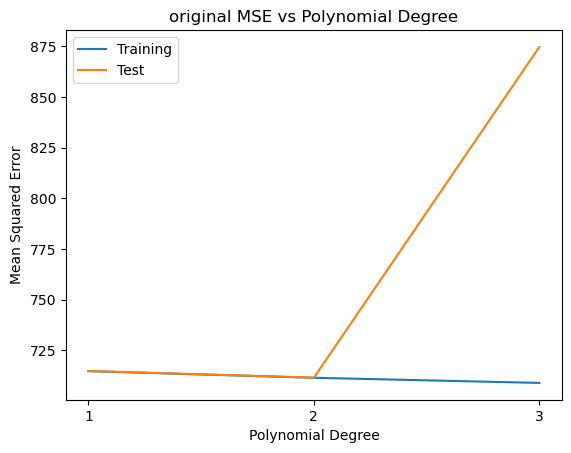

In [61]:
plt.figure()
plt.title('original MSE vs Polynomial Degree')
plt.plot(range(1, 4), mse_training_list_original[0:3], label='Training')
plt.plot(range(1, 4), mse_test_list_original[0:3], label='Test')
plt.xticks(range(1, 4))

plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

Rebuild the Model for Polynomial Degree 2

In [62]:
poly = PolynomialFeatures(degree=2)

x_train_poly = poly.fit_transform(x_train_scaled)
x_test_poly = poly.fit_transform(x_test_scaled)

poly_reg_model = LinearRegression()
poly_reg_model.fit(x_train_poly, y_train_scaled)

yhat_train = poly_reg_model.predict(x_train_poly)
yhat_test = poly_reg_model.predict(x_test_poly)

ground_truth = y_train_scaled[0]
print("Ground Truth Train: ", ground_truth)

predicted = yhat_train[0]
print("Predicted Train: ", predicted)


ground_truth = y_test_scaled[0]
print("Ground Truth Test: ", ground_truth)

predicted = yhat_test[0]
print("Predicted Test: ", predicted)

Ground Truth Train:  [0.15607424]
Predicted Train:  [0.11244413]
Ground Truth Test:  [0.11107987]
Predicted Test:  [0.17442367]


Above is an exmaple opf our ground truth and predictions for our training and testing dataset with a 2nd degree polynomial regression model.

### Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

After plotting our fitting graph, we notice that the training MSE decreases as the polynomial degree increases. However, the testing MSE decreases from degree 1 to degree 2 and increases from degree 2 onwards. After degree 2, our model shows signs of overfitting. Therefore, we believe a second degree polynomial model fits our dataset the best.

For our next model, we are thinking about using a decision tree. Many of our features can be easily split by placing thresholds. For example, the temperature of the day. Our decision tree leaf nodes would be the amount of bikes being rented out on a given day.

### What is the conclusion of your 1st model? What can be done to possibly improve it?

For our first model, we think the MSE is acceptable. We picked a good complexity for our polynomial model based on the fitting graph. We picked the optimal degree to avoid overfitting. To improve our model, we can use graident descent to optimize the weights in our model. We can also use k-fold cross validation and feature expansion to improve upon our current model.